In [1]:
#q1
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import csv
def get_mapping(path):
    with open(path, mode='r') as inp:
        reader = csv.reader(inp)
        d= {rows[0]:rows[1] for rows in reader}
    return d
dic = get_mapping("small_mapping.csv")
get_mapping("small_mapping.csv")


{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [2]:
#q2
(dic['tt0313542'])

'Runaway Jury'

In [3]:
#q3
list1 = []          ## 空列表
for key in dic.keys():
    if ( "tt" in key) :
        list1.append(str(dic[key]))
list1

['Runaway Jury', 'Lethal Weapon']

In [4]:
#q4
list2 = []
for k, v in dic.items():
    if("Gary " in v) :
        list2.append(str(k))
list2


['nm0000997', 'nm0001219']

In [5]:
#q5
import csv
def get_raw_movies(path):
    list1 = []
    with open(path,'r',encoding="utf-8") as f:
        reader = csv.reader(f)
        fieldnames = next(reader)#获取数据的第一列，作为后续要转为字典的键名 生成器，next方法获取
        # print(fieldnames)
        csv_reader = csv.DictReader(f,fieldnames=fieldnames) #self._fieldnames = fieldnames   # list of keys for the dict 以list的形式存放键名
        for row in csv_reader:
            d={}
            for k,v in row.items():
                if k == "directors":
                    list2 = []
                    str3 = v
                    list2 = str3.split(",")
                    d[k]=list2   
                elif k == "actors":
                    list2 = []
                    str3 = v
                    list2 = str3.split(",")
                    d[k] = list2
                elif k == "genres":
                    list2 = []
                    str3 = v
                    list2 = str3.split(",")
                    d[k] = list2
                elif k == "year":
                    d[k] = int(v)     
                elif k =="rating":
                    d[k] = float(v)
                else:
                    d[k]=v
            list1.append(d)
    return list1
lis = get_raw_movies("small_movies.csv")
get_raw_movies("small_movies.csv")
   

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [6]:
#q6
res = lis[0]
res1 = res['genres']
len(res1)

3

In [7]:
#q7
res = lis[1]
res1 = res['actors']
res1[-1]


'nm0752751'

In [8]:
def get_movies(movies_path, mapping_path):
    mapping = get_mapping(mapping_path)
    list1 = get_raw_movies(movies_path)
    for item in list1:
        for key in item:
            if key == "title":
                for k,v in mapping.items():
                    if item[key] == k:
                        item[key] = v
            elif key == "directors" or key == "actors" :
                len1 = len(item[key])
                #print(len1)
                i = 0
                for it in item[key]:
                    for k,v in mapping.items():
                        if it == k:
                            item[key].append(v)
                del item[key][0:len1]
    return list1

small = get_movies("small_movies.csv", "small_mapping.csv")


In [9]:
#q8
small[0]["title"]

'Runaway Jury'

In [10]:
#q9
small[1]["directors"]

['Richard Donner']

In [11]:
#q10
small[-1]["actors"]

['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [12]:
#q11
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [13]:
movies = get_movies("movies.csv", "mapping.csv")

In [14]:
#q12
movies[0:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [15]:
#q13
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [16]:
# you are not allowed to change this function
def filter_movies_by_year(movies, year):
    i = 0
    list1 = []
    while i < len(movies):
        if movies[i]["year"] != year:     
            i = i+1
        else:
            list1.append(movies[i])
            #print(movies[i]["directors"])
            i += 1
    
    return list1

In [17]:
#q14
filter_movies_by_year(movies, 1930)

[{'title': 'Hook Line and Sinker',
  'year': 1930,
  'rating': 6.4,
  'directors': ['Edward F. Cline'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Ralf Harolde'],
  'genres': ['Comedy', 'Romance']},
 {'title': 'The Big Trail',
  'year': 1930,
  'rating': 7.2,
  'directors': ['Raoul Walsh', 'Louis R. Loeffler'],
  'actors': ['John Wayne', 'El Brendel', 'Tully Marshall'],
  'genres': ['Adventure', 'Romance', 'Western']}]

In [18]:
#q15
filter_movies_by_year(movies, 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [19]:
def diff(type):
    list1 = []
    i = 0
    #if type == "genres":
    while i < len(movies):
        res = movies[i][type]            #print(res)
        for v in res:
            list1.append(v)
        i += 1
        #print(list1)
    list2 = []
    [list2.append(i) for i in list1 if not i in list2]
    #lst2 = list(set(list1))
    return len(list2)

In [20]:
#q16
diff("genres")

18

In [21]:
#q17
diff("actors")

2605

In [22]:
#q18
diff("directors")

1247

In [23]:
#q19
def averagerating():
    average = 0.0
    i = 0
    while i < len(movies):
            average += movies[i]["rating"]
            i += 1
    return average/len(movies)
averagerating()  

6.401659528907912

In [24]:
#q20
def longestname():
    length = 0
    i = 0
    while i < len(movies):
        if length < len(movies[i]["title"]):
            length =  len(movies[i]["title"])
            longest =  movies[i]["title"]
        i += 1
    return longest
longestname()

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [25]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [26]:
def bucketize(movie_list, movie_key):
    # TODO: return dict of lists of movie dicts
    d = {}
    for item in movie_list:
        if movie_key == "genres" or movie_key == "actors"or movie_key == "directors":
             for g_key in item[movie_key]:
                    if (g_key in d):
                        d[g_key].append(item)
                    else:
                        l = []
                        l.append(item)
                        d[g_key] = l
        else:
            keyname = movie_key
            if(item[keyname] in d):
                d[item[keyname]].append(item)
            else:
                 l = []
                 l.append(item)
                 d[item[keyname]] = l
    return d
                        
                        
        
    

In [27]:
#q21
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [28]:
#q22
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [29]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [30]:
#q24
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [31]:
#q25
len(bucketize(small, "actors"))

7

In [32]:
#q26
len(bucketize(movies, "genres"))

18

In [33]:
#q27
bucket = bucketize(movies, "genres")
def bucketnum(bucket):
    d = {}
    for key in bucket:
        value = len(bucket[key])
        d[key] = value
    return d
bucketnum(bucket)

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

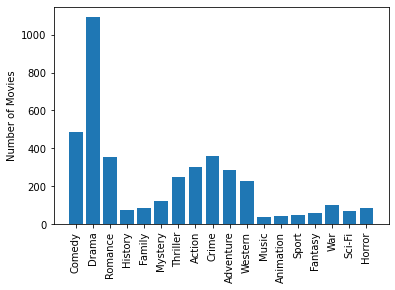

In [34]:
#q28
import matplotlib.pyplot as plt

d = bucketnum(bucket)
def plot(d):
    plt.bar(d.keys(), d.values())
    plt.xticks(rotation = 90)
    plt.ylabel('Number of Movies')
    plt.show()
plot(d)

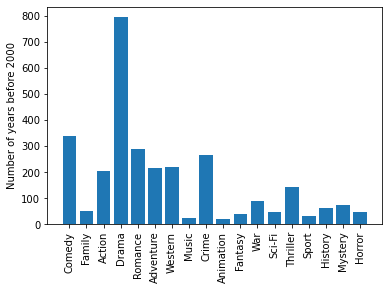

In [35]:
#q29
def bucketize_years(movie_list, movie_key, year_type):
    d = {}
    for item in movie_list:
        if year_type == 0: #before 2000
            for g_key in item[movie_key]:   
                if item["year"] < 2000:
                    
                    if (g_key in d):
                        d[g_key].append(item)
                    else:
                        l = []
                        l.append(item)
                        d[g_key] = l
        elif year_type == 1:
              for g_key in item[movie_key]:
                if item["year"] >= 2000:
                    if (g_key in d):
                        d[g_key].append(item)
                    else:
                        l = []
                        l.append(item)
                        d[g_key] = l
    return d

bucket = bucketize_years(movies,"genres",0)
d = bucketnum(bucket)
plt.bar(d.keys(), d.values())
plt.xticks(rotation = 90)
plt.ylabel('Number of years before 2000')
plt.show()


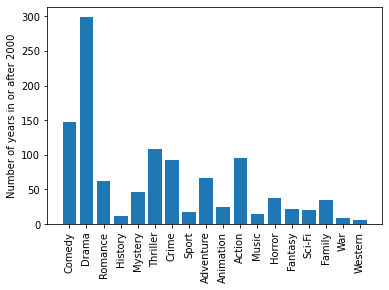

In [36]:
#q30
bucket = bucketize_years(movies,"genres",1)
d = bucketnum(bucket)
plt.bar(d.keys(), d.values())
plt.xticks(rotation = 90)
plt.ylabel('Number of years in or after 2000')
plt.show()

In [37]:
def plot_year(movie_list, movie_key):
    d = {}
    for item in movie_list:
        keyname = movie_key
        if(item[keyname] >= 2000):
            if(str(item[keyname]) in d):
                d[str(item[keyname])].append(item)
            else:
                l = []
                l.append(item)
                d[str(item[keyname])] = l
    num = bucketnum(d)
    plt.bar(num.keys(), num.values())
    plt.ylabel('Number of years since 2000')
    plt.xticks(rotation = 90)
    plt.show()

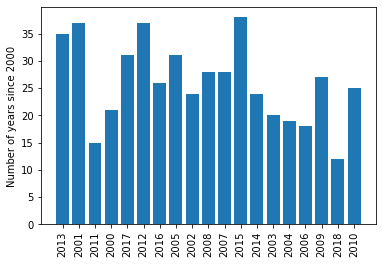

In [38]:
#q31
plot_year(movies, "year")

In [39]:
import collections
def span(movie_key,year_span):
    dic = {}
    len_min = 0
    remain = 10
    bucket = bucketize(movies, movie_key)
    for key in bucket:
        first = last = 0
        for item in bucket[key]:
            if first == 0:
                first = item["year"]
                last = item["year"]
            else:
                if item["year"] < first:
                    first = item["year"]
                elif item["year"] > last:
                    last = item["year"]
        len = last - first
        if len >= year_span:
            dic[key] = len
        ''' 
        if remain > 0:
            dic[key] = len
            if remain == 10:
                len_min = len
                name = key
            if len_min > len:
                len_min = len
            remain -= 1
        else:
            if len_min < len :
                #print(dic)
                k = list(dic.keys())[list(dic.values()).index(len_min)]
                #print(k)
                del dic[k]
               
                dic[key] = len
               # print(dic)
                len_min = 1000
                for k,v in dic.items():
                    if len_min == 1000:
                        len_min = v
                    else:
                        if v < len_min:
                            len_min = v  
        '''
    #dic1 = collections.OrderedDict(sorted(dic.items(), key = lambda x:(-x[1],x[0])))
    return dic 
        

In [40]:
#q32
span("directors",30)

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [41]:
#q33
span("actors", 40)

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Dennis Quaid': 40,
 'Marlon Brando': 49,
 'Armand Assante': 40,
 'Eddie Albert': 41,
 'Jon Voight': 44,
 'Tony Curtis': 45,
 'Michael Constantine': 42,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Fredric March': 41,
 'Lloyd Bridges': 44,
 'Robert Redford': 44,
 'Dean Stockwell': 53}

In [42]:
def span_num(movie_key,n):
    dic = {}
    len_min = 0
    remain = n
    bucket = bucketize(movies, movie_key)
    for key in bucket:
        first = last = 0
        for item in bucket[key]:
            if first == 0:
                first = item["year"]
                last = item["year"]
            else:
                if item["year"] < first:
                    first = item["year"]
                elif item["year"] > last:
                    last = item["year"]
        len = last - first
        if remain > 0:
            dic[key] = len
            if remain == n:
                len_min = len
                name = key
            if len_min > len:
                len_min = len
            remain -= 1
        else:
            if len_min < len :
                #print(dic)
                k = list(dic.keys())[list(dic.values()).index(len_min)]
                #print(k)
                del dic[k]
               
                dic[key] = len
               # print(dic)
                len_min = 1000
                for k,v in dic.items():
                    if len_min == 1000:
                        len_min = v
                    else:
                        if v < len_min:
                          len_min = v  
        
    #dic1 = collections.OrderedDict(sorted(dic.items(), key = lambda x:(-x[1],x[0])))
    return dic 

def row_ranking(row):
    return row["span"]

def top_n_span(movie_key, n):
    # TODO: spans should be a dictionary mapping name to career span
    spans = span_num(movie_key,n)
    rows = []
    for name in spans:
        span1 = spans[name]
        rows.append({"name": name, "span": span1})
        
    # we want to sort the rows so that those with the biggest spans
    # are first.  Notice that we aren't calling row_ranking, but rather
    # passing a reference to this function to the sort method.  The sort
    # method uses this function to determine how to rank the rows.
    # 
    # we do a reverse sort because we want the biggest spans first,
    # not last
    rows.sort(key=row_ranking, reverse=True)

    return rows
    # TODO: return a slice of the rows
    #row_ranking(rows)


In [43]:
#q34
top_n_span("directors", 10)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [44]:
#q35
top_n_span("actors", 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [45]:
def best_rating(movie_key, n):
    dic = {}
    bucket = bucketize(movies, movie_key)
    for key in bucket:
        data = []
        count = 0
        for item in bucket[key]:
            data.append(item["rating"])
        count = len(data)
        data.sort()
        half = len(data) // 2
        median = (data[half] + data[~half])/2
        dic[key]  = [median, count]
    remain = 0
    len_dic = len(dic)
    dic1 = {}
    while remain < n:
        list_max = 0
        i = 0
        for k,v in dic.items():
            if i == 0:
                list_max = v
                name = k
                i = 1
            else:
                if(list_max[0] < v[0]):
                    list_max = v
                    name = k
        dic1[name] = list_max
        del dic[name]
        remain += 1
    return dic1

def top_n_span2(movie_key, n):
    # TODO: spans should be a dictionary mapping name to career span
    spans = best_rating(movie_key,n)
    rows = []
    for name in spans:
        rating_ = spans[name][0]
        count_ = spans[name][1]
        rows.append({"category": name, "rating": rating_, "count": count_})

    return rows

In [46]:
#q36
top_n_span2("genres", 3)

[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [47]:
#q37
top_n_span2("year", 10)

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]

In [48]:
def best_rating_num(movie_key, n, num):
    dic = {}
    bucket = bucketize(movies, movie_key)
    for key in bucket:
        data = []
        count = 0
        for item in bucket[key]:
            data.append(item["rating"])
        count = len(data)
        data.sort()
        half = len(data) // 2
        median = (data[half] + data[~half])/2
        if count >= num:
            dic[key]  = [median, count]
    remain = 0
    len_dic = len(dic)
    dic1 = {}
    while remain < n:
        list_max = 0
        i = 0
        for k,v in dic.items():
            if i == 0:
                list_max = v
                name = k
                i = 1
            else:
                if(list_max[0] < v[0]):
                    list_max = v
                    name = k
        dic1[name] = list_max
        del dic[name]
        remain += 1
    return dic1

def top_n_span3(movie_key, n, num):
    # TODO: spans should be a dictionary mapping name to career span
    spans = best_rating_num(movie_key,n, num)
    rows = []
    for name in spans:
        rating_ = spans[name][0]
        count_ = spans[name][1]
        rows.append({"category": name, "rating": rating_, "count": count_})

    return rows


In [49]:
#q38
top_n_span3("year", 5, 10)

[{'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17}]

In [50]:
#q39
top_n_span3("directors", 6, 3)

[{'category': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'category': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'category': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'category': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'category': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'category': 'Andrew Grieve', 'rating': 8.2, 'count': 6}]

In [51]:
#q40
top_n_span3("actors", 3, 5)

[{'category': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'category': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'category': 'Robert Lindsay', 'rating': 8.2, 'count': 6}]